# **CASE: HÁBITOS ALIMENTARES**

---

### Instalação de bibliotecas

In [13]:
# Para visualização dos clusters com k-médias
install.packages("factoextra")
# Para criação de grid de gráficos
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Carregamento de bibliotecas

In [1]:
library(tidyverse) # já pré-instalado, se for em Google Colab
library(factoextra)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Leitura da base de dados

In [2]:
dados_habitos <- read.table(file   = "../Dados/Habitos_Alimentares.txt",
                            sep    = "\t",
                            header = TRUE)

### Visualização da base de dados

In [3]:
View(dados_habitos)

PAIS,CARNE_VERMELHA,CARNE_BRANCA,OVOS,LEITE,PEIXES,CEREAIS,CARBOIDRATOS,GRAOS,FRUTAS_LEGUMES
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,86.0,14.2,34.9,173.5,1.9,81.7,15.8,97.8,31.4
Alemanha,97.1,127.1,286.6,366.5,32.3,35.9,137.2,26.7,70.2
Austria,75.8,142.4,300.5,388.0,20.0,54.1,95.0,23.1,79.5
Belgica,115.0,94.6,286.6,341.2,42.8,51.4,150.4,37.3,73.9
Bulgaria,66.4,61.0,111.8,161.8,11.4,109.5,29.0,65.8,77.6
Croacia,37.5,50.8,83.9,185.2,5.7,108.0,79.2,101.4,59.1
Dinamarca,90.3,109.8,258.6,487.4,94.2,42.3,126.7,12.4,44.4
Eslovaquia,82.6,115.9,195.7,243.7,19.0,66.2,132.0,19.6,73.9
Espanha,60.5,34.6,216.7,167.7,66.6,56.4,150.4,104.9,133.1


### Análise exploratória breve

In [4]:
# Medidas resumo
summary(dados_habitos)

     PAIS           CARNE_VERMELHA    CARNE_BRANCA         OVOS      
 Length:25          Min.   : 37.50   Min.   : 14.20   Min.   : 34.9  
 Class :character   1st Qu.: 66.40   1st Qu.: 49.80   1st Qu.:188.7  
 Mode  :character   Median : 80.90   Median : 79.30   Median :202.7  
                    Mean   : 83.71   Mean   : 80.29   Mean   :205.2  
                    3rd Qu.: 90.30   3rd Qu.:109.80   3rd Qu.:258.6  
                    Max.   :153.30   Max.   :142.40   Max.   :328.5  
     LEITE           PEIXES          CEREAIS        CARBOIDRATOS  
 Min.   : 95.5   Min.   :  1.90   Min.   : 35.90   Min.   : 15.8  
 1st Qu.:216.4   1st Qu.: 20.00   1st Qu.: 46.90   1st Qu.: 81.8  
 Median :343.1   Median : 32.30   Median : 54.10   Median :124.0  
 Mean   :333.6   Mean   : 40.75   Mean   : 62.28   Mean   :112.8  
 3rd Qu.:454.2   3rd Qu.: 55.20   3rd Qu.: 77.40   3rd Qu.:150.4  
 Max.   :657.0   Max.   :135.10   Max.   :109.50   Max.   :171.6  
     GRAOS        FRUTAS_LEGUMES  
 Min. 

### Padronização e cálculo da matriz de distâncias

In [5]:
# Padronização das variaveis quantitativas
dados_habitos_padronizada <- scale(dados_habitos[,-1])

In [6]:
# Cálculo da matriz de distâncias euclidianas
dist_habitos <- dist(dados_habitos_padronizada, method = "euclidean")

In [18]:
View(dist_habitos)

           1         2         3         4         5         6         7
2  6.3553294                                                            
3  6.1376338 1.6452850                                                  
4  5.9500950 1.4184658 2.4510683                                        
5  2.7645374 5.6114134 4.9004131 5.2374119                              
6  2.9425737 5.9649796 5.4469313 5.6045722 1.9931948                    
7  6.6357082 2.3934624 3.0196575 2.5385591 6.0372952 6.3638037          
8  5.1421092 2.1832644 2.1307885 2.2189428 3.9518983 4.3419829 3.3689013
9  5.5694731 4.6031186 4.8876937 3.9987768 4.8420628 4.5683353 5.1115977
10 5.8799026 3.6541976 4.0724597 3.5043692 5.8174808 5.7952802 2.6337214
11 6.3075295 2.9359284 3.5879457 2.1938456 5.5605804 6.3053748 3.6618519
12 4.2561770 5.3625893 5.1632665 4.6946085 3.7635696 3.9309479 5.5963381
13 6.0084791 1.2738794 1.1225496 2.2488058 5.1673802 5.5032049 2.5370778
14 4.6753520 3.9008956 3.2849245 3.9940367 3.347009

### Agrupamento pelo algoritmo hierárquico

In [7]:
# Execução do algoritmo para diferentes critérios de ligação
clust_habitos_complete <- hclust(dist_habitos, method = "complete")
clust_habitos_single   <- hclust(dist_habitos, method = "single")
clust_habitos_average  <- hclust(dist_habitos, method = "average")
clust_habitos_ward     <- hclust(dist_habitos, method = "ward.D")

In [16]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
options(repr.plot.width = 10, repr.plot.height = 10)

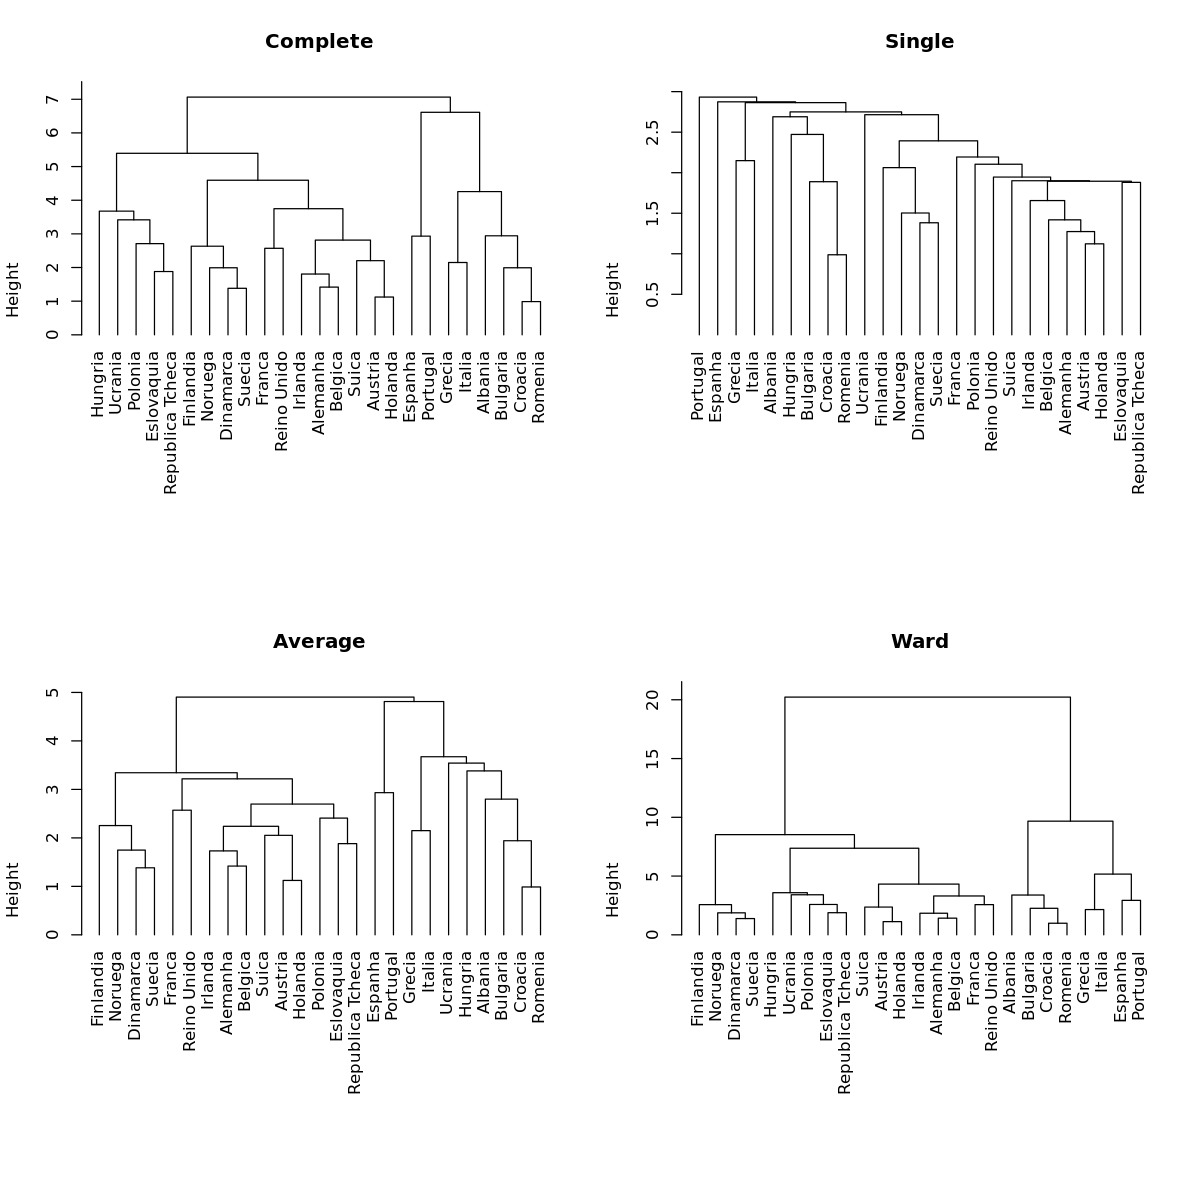

In [17]:
# Visualização dos dendrogramas resultantes
par(mfrow = c(2,2))
plot(clust_habitos_complete, main = "Complete", hang = -1, labels = dados_habitos$PAIS, xlab = "", sub = "")
plot(clust_habitos_single,   main = "Single",   hang = -1, labels = dados_habitos$PAIS, xlab = "", sub = "")
plot(clust_habitos_average,  main = "Average",  hang = -1, labels = dados_habitos$PAIS, xlab = "", sub = "")
plot(clust_habitos_ward,     main = "Ward",     hang = -1, labels = dados_habitos$PAIS, xlab = "", sub = "")

In [23]:
# Substitua o ponto (.) pelo nome do objeto correspondente ao critério de ligação que você considera mais adequado
segmentacao_escolhida <- clust_habitos_average  # por exemplo: clust_habitos_single

In [24]:
# Substitua o ponto (.) pela quantidade k de grupos que deseja, para o método escolhido
k_escolhido <- 3 # por exemplo: 2

In [25]:
# Registrando os clusters da segmentação escolhida como uma nova coluna na base de dados
dados_habitos$cluster_hierarquico <- as.factor(cutree(segmentacao_escolhida, k_escolhido))

### Análise descritiva dos clusters do algoritmo hierárquico

In [26]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
options(repr.plot.width = 20, repr.plot.height = 8)

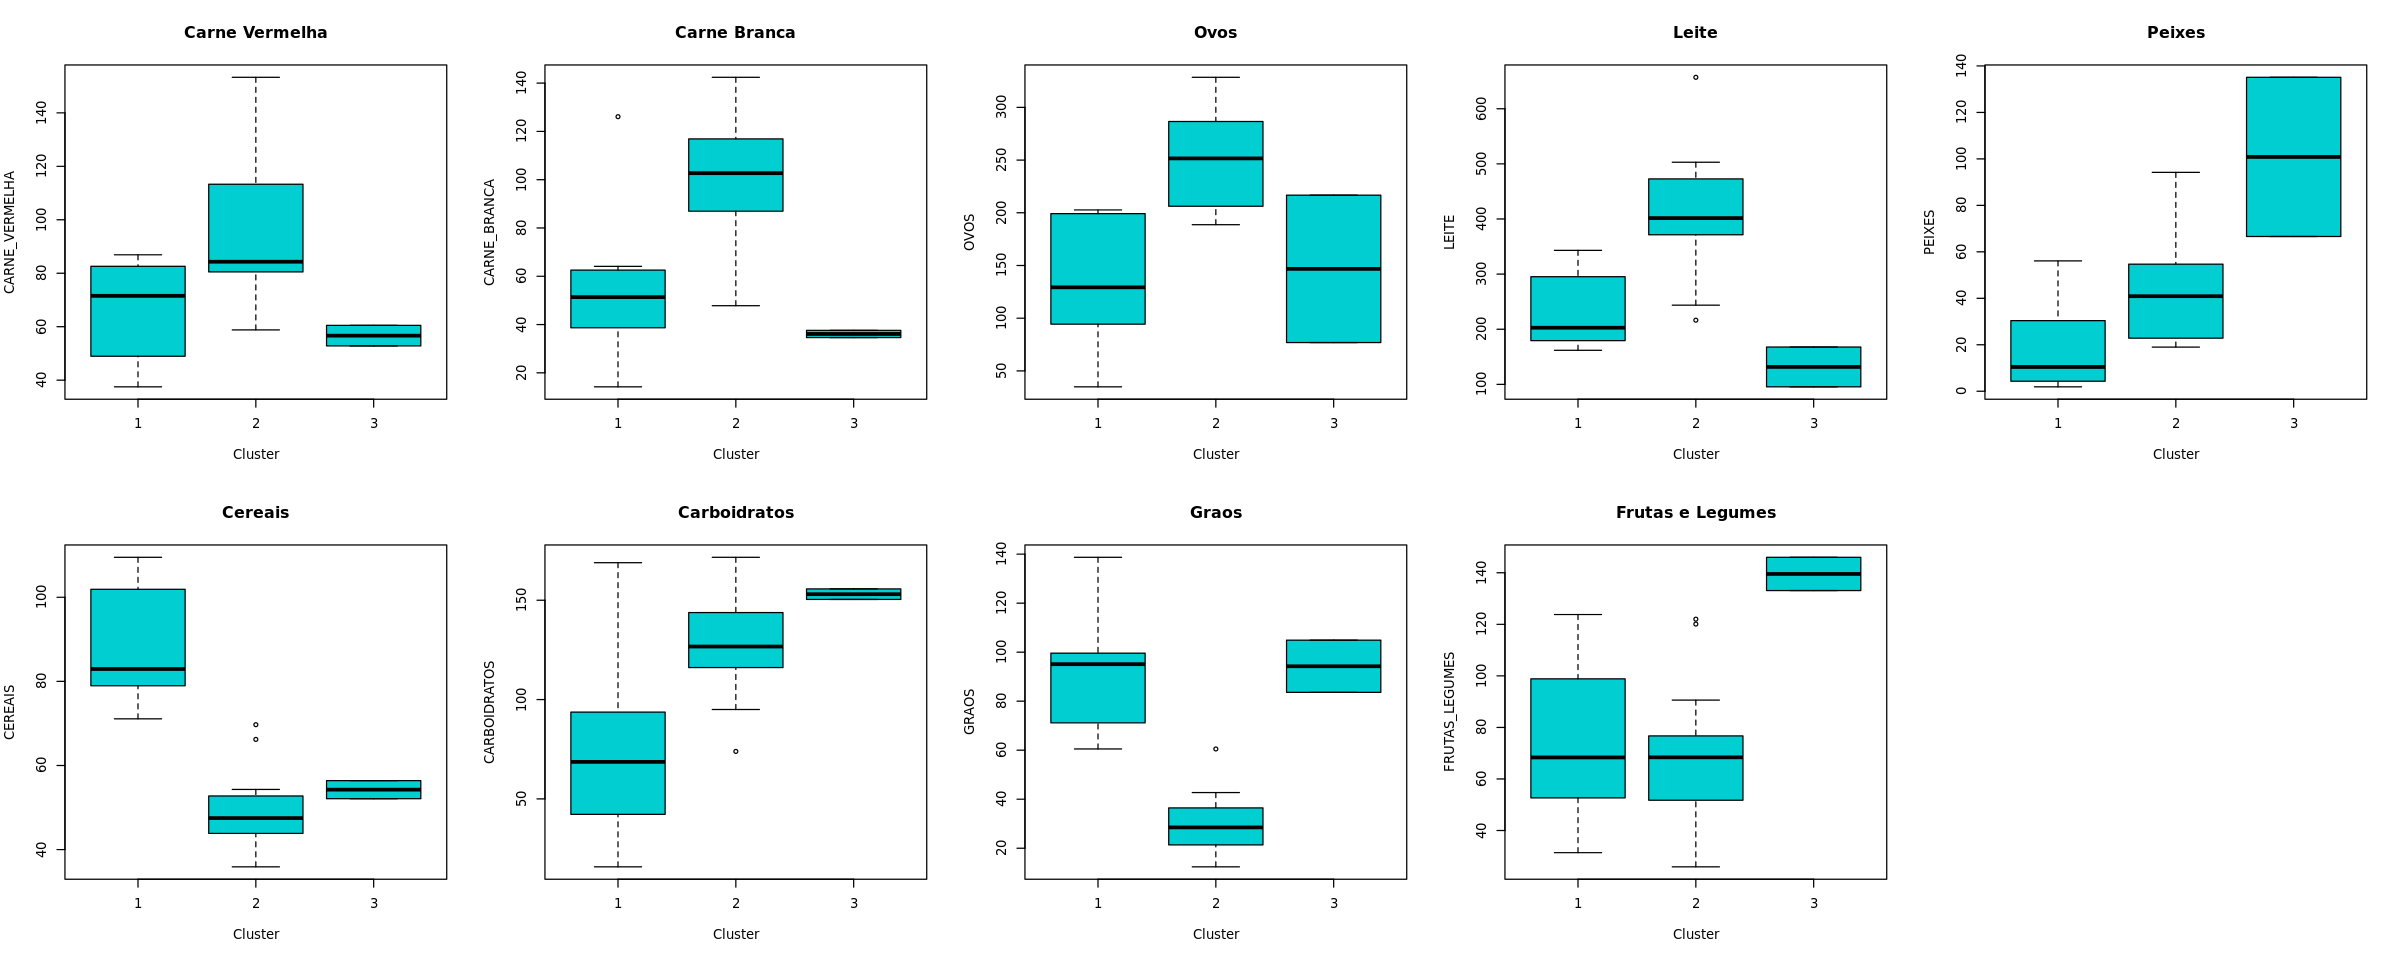

In [27]:
# Gráficos de boxplot
par(mfrow = c(2,5))
boxplot(CARNE_VERMELHA ~ cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Carne Vermelha")
boxplot(CARNE_BRANCA ~   cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Carne Branca")
boxplot(OVOS ~           cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Ovos")
boxplot(LEITE ~          cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Leite")
boxplot(PEIXES ~         cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Peixes")
boxplot(CEREAIS ~        cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Cereais")
boxplot(CARBOIDRATOS ~   cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Carboidratos")
boxplot(GRAOS ~          cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Graos")
boxplot(FRUTAS_LEGUMES ~ cluster_hierarquico, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Frutas e Legumes")

### Agrupamento pelo algoritmo k-médias

In [28]:
# Definição de semente aleatória, para reprodutibilidade dos resultados
set.seed(12345)

In [29]:
# Execução do algoritmo para diferentes valores de k
clust_habitos_kmedias_k2 <- kmeans(dados_habitos_padronizada, centers = 2, nstart = 25, iter.max = 100)
clust_habitos_kmedias_k3 <- kmeans(dados_habitos_padronizada, centers = 3, nstart = 25, iter.max = 100)
clust_habitos_kmedias_k4 <- kmeans(dados_habitos_padronizada, centers = 4, nstart = 25, iter.max = 100)
clust_habitos_kmedias_k5 <- kmeans(dados_habitos_padronizada, centers = 5, nstart = 25, iter.max = 100)

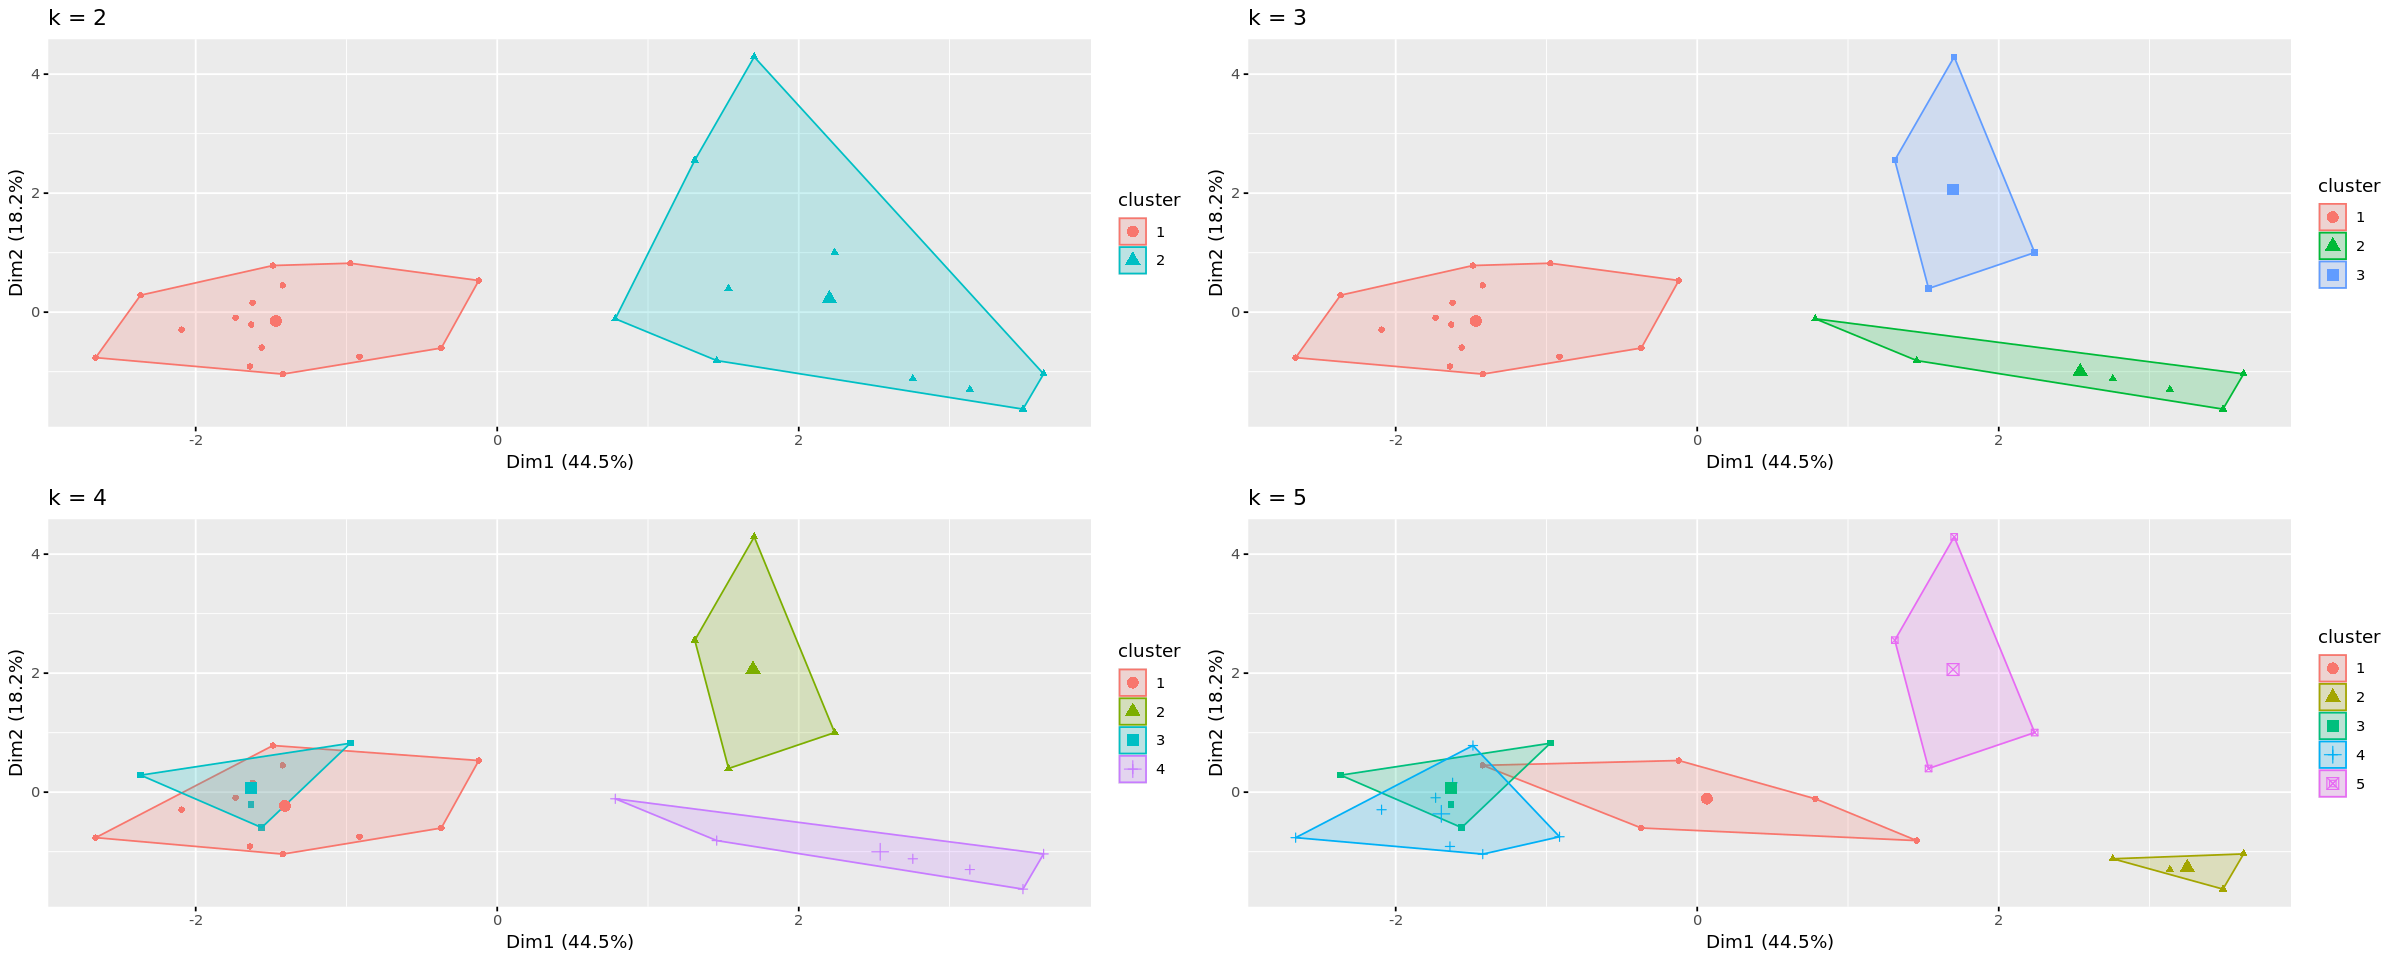

In [34]:
# Visualização dos clusters de forma aproximada, reduzindo para 2 dimensões
grafico_k2 <- fviz_cluster(clust_habitos_kmedias_k2, data = dados_habitos_padronizada, geom = "point", main = "k = 2")
grafico_k3 <- fviz_cluster(clust_habitos_kmedias_k3, data = dados_habitos_padronizada, geom = "point", main = "k = 3")
grafico_k4 <- fviz_cluster(clust_habitos_kmedias_k4, data = dados_habitos_padronizada, geom = "point", main = "k = 4")
grafico_k5 <- fviz_cluster(clust_habitos_kmedias_k5, data = dados_habitos_padronizada, geom = "point", main = "k = 5")
grid.arrange(grafico_k2, grafico_k3, grafico_k4, grafico_k5, nrow = 2)

In [31]:
# Substitua o ponto (.) pelo nome do objeto correspondente ao valor de k que você considera mais adequado
segmentacao_escolhida <- clust_habitos_kmedias_k2  # por exemplo: clust_habitos_kmedias_k2

In [32]:
# Registrando os clusters da segmentação escolhida como uma nova coluna na base de dados
dados_habitos$cluster_kmedias <- segmentacao_escolhida$cluster

### Análise descritiva dos clusters do algoritmo k-médias

In [20]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
options(repr.plot.width = 20, repr.plot.height = 8)

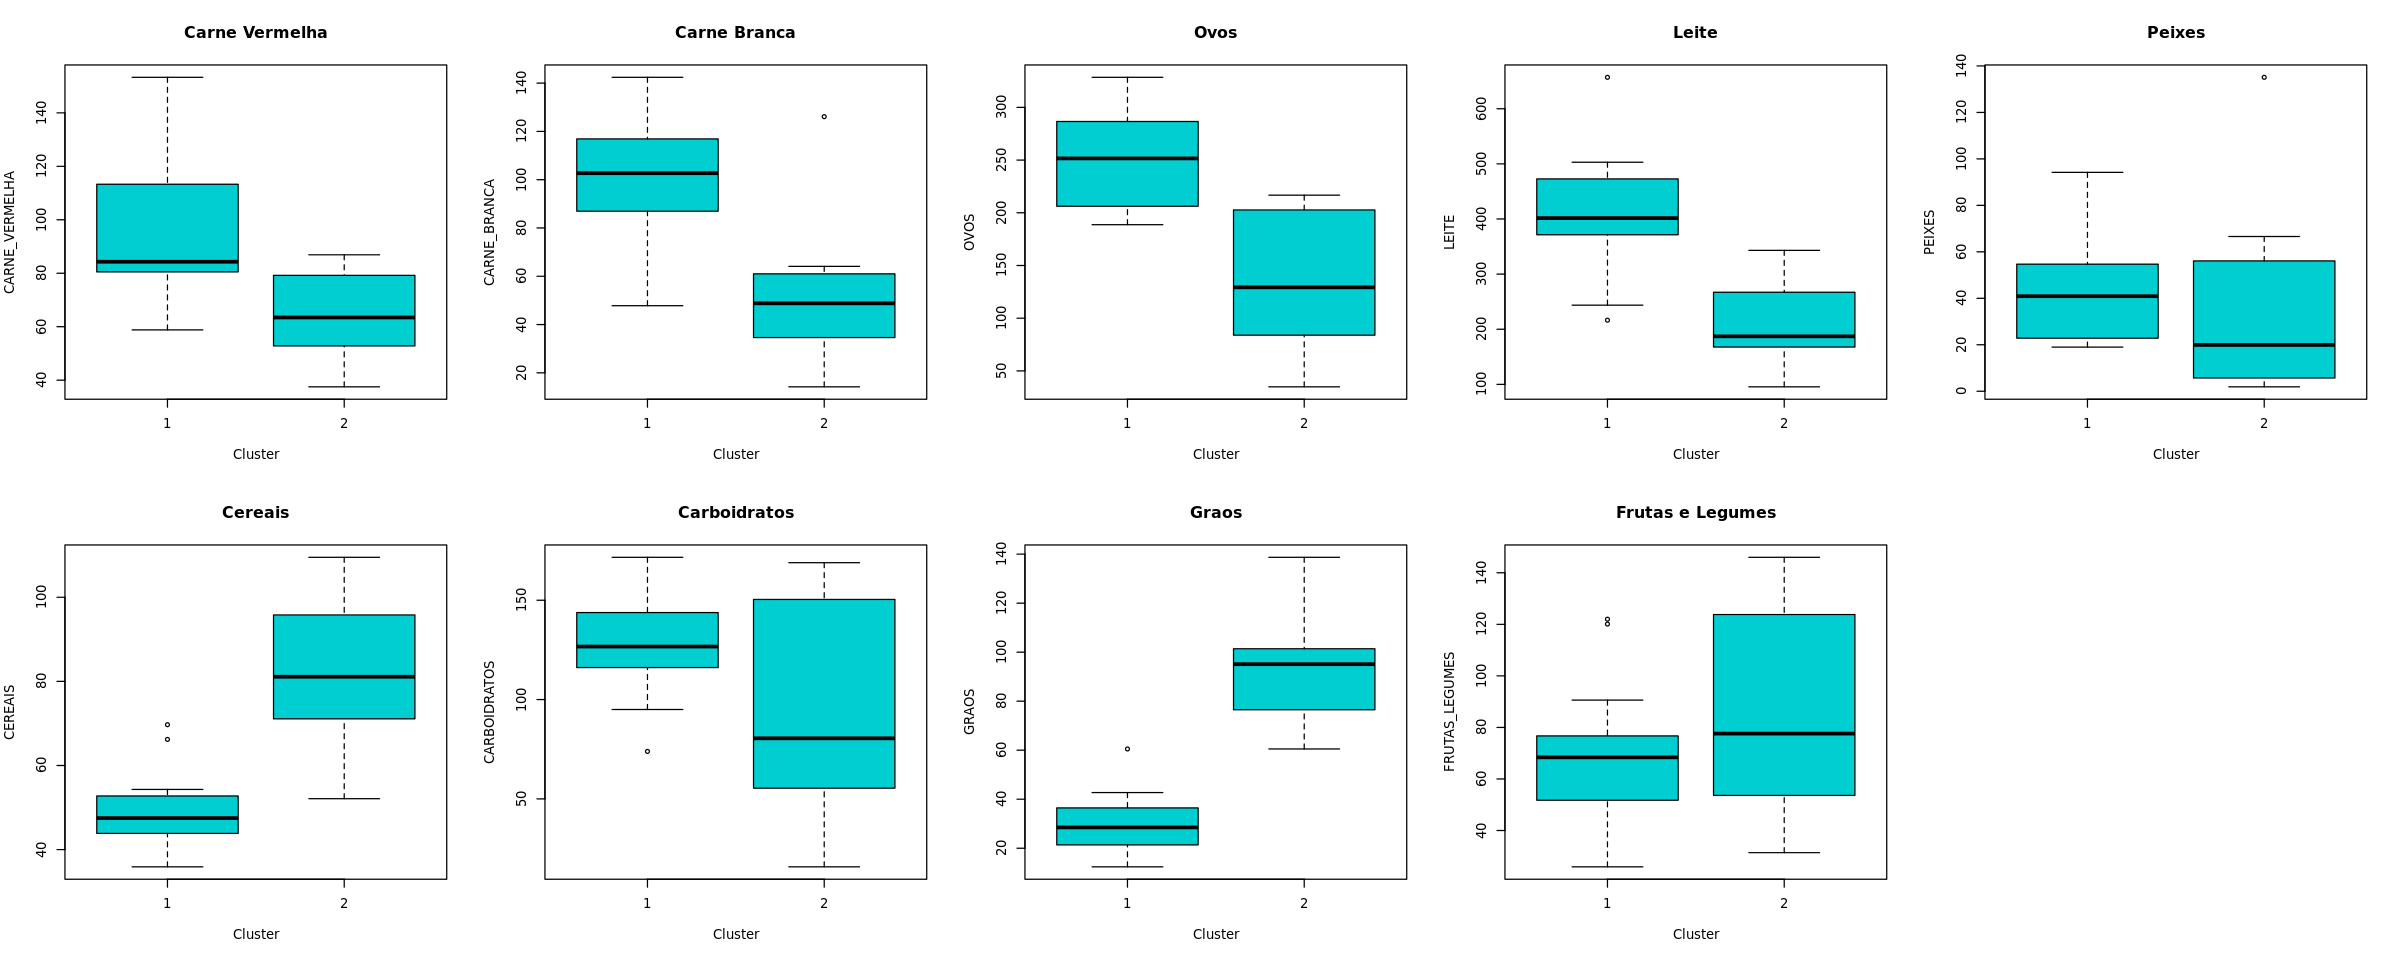

In [21]:
# Gráficos de boxplot
par(mfrow = c(2,5))
boxplot(CARNE_VERMELHA ~ cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Carne Vermelha")
boxplot(CARNE_BRANCA ~   cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Carne Branca")
boxplot(OVOS ~           cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Ovos")
boxplot(LEITE ~          cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Leite")
boxplot(PEIXES ~         cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Peixes")
boxplot(CEREAIS ~        cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Cereais")
boxplot(CARBOIDRATOS ~   cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Carboidratos")
boxplot(GRAOS ~          cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Graos")
boxplot(FRUTAS_LEGUMES ~ cluster_kmedias, data = dados_habitos, col = "darkturquoise", xlab = "Cluster", main = "Frutas e Legumes")